# Kaggle Bike Sharing Demand 자전거 수요 예측

## 주어진 데이터를 이용해 어떤 환경에서 자전거 수요가 높은지 확인하고 상위권 점수에 도전해 보겠습니다.

### 라이브러리 셋팅

In [1]:
import pandas as pd  #pandas는 분석용 라이브러리입니다.
import seaborn as sns  #seaborn은 시각화 라이브러리입니다.
import numpy as np  #numpy는 고성능 수칙계산을 용이하게 하는 라이브러리입니다.
import matplotlib.pyplot as plt  #matplotlib.pyplot은 시각화 보조 라이브러리입니다. 현재 파이썬 파일에서 시각화 자료를 보여주도록 matplotlib inline도 추가하겠습니다.
%matplotlib inline  

### 데이터 로드

#### -훈련용 데이터 training data

In [3]:
train = pd.read_csv('train.csv')  #train이라는 변수에 csv파일을 읽는 코드인 pd.read_csv를 이용해 train.csv 파일을 불러옵니다.
print(train.shape)  #train.shape를 이용해 행과 열의 갯수를 파악합니다. train 데이터는 10886개의 행과 12개의 열로 이루어져 있습니다.
train.head()  #head()의 기능을 이용해 train데이터에서 가장 위에 있는 5개의 데이터를 불러옵니다.

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### -테스트용 데이터 test data

In [2]:
test = pd.read_csv('test.csv')  #test라는 변수에 csv파일을 읽는 코드인 pd.read_csv를 이용해 test.csv 파일을 불러옵니다.
print(test.shape)  #test.shape를 이용해 행과 열의 갯수를 파악합니다. test 데이터는 6493개의 행과 9개의 열로 이루어져 있습니다.
test.head()  #head()의 기능을 이용해 test데이터에서 가장 위에 있는 5개의 데이터를 불러옵니다.

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 0:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 1:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 2:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 3:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 4:00,1,0,1,1,10.66,12.880,56,11.0014


### 컬럼(열) 설명

datetime = 시간(연, 월, 일, 시, 분, 초) \
season = 날씨(1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울) \
holiday = 공휴일(0 = 공휴일 X, 1 = 공휴일 O) \
workingday = 근무일(0 = 근무일 X, 1 = 근무일 O) \
weather = 날씨(1 = 맑음, 2 = 흐림, 3 = 약한 눈, 비 4 = 강한 폭풍우) \
temp = 기온 섭씨 \
atemp = 체감온도 섭씨 \
humidity = 습도 \
windspeed = 풍속 \
casual = 비회원 대여량 \
resistered = 회원 대여량 \
count = 총 대여량

### 데이터 전처리

-먼저 각 컬럼의 데이터 타입을 확인하도록 하겠습니다. 

In [4]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

확인한 결과 datetime을 제외한 모든 컬럼이 숫자형으로 이루어져 있기 때문에 datetime만 처리하면 머신러닝 알고리즘에 쉽게 적용할 수 있겠다는 판단에 데이터 전처리를 먼저 진행하도록 하겠습니다.

#### datatime 시계열 데이터 처리

In [5]:
train['datetime'].head()  #datetime을 보면 숫자형 데이터라고 생각이 들지만, object형으로 되어있는 것을 알 수 있습니다.
                          #따라서 이를 분석하기 쉽게 연, 월, 일, 시, 분, 초 단위로 나눠 숫자형 데이터로 만들도록 하겠습니다.

0    2011-01-01 0:00
1    2011-01-01 1:00
2    2011-01-01 2:00
3    2011-01-01 3:00
4    2011-01-01 4:00
Name: datetime, dtype: object

In [6]:
train['datetime'] = pd.to_datetime(train['datetime'])  #pd.to_datetime을 이용해 데이터 타입을 우선 datetime으로 바꾸도록 하겠습니다.
train['datetime'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [7]:
test['datetime'] = pd.to_datetime(test['datetime'])  #test 데이터에도 적용하도록 하겠습니다.
test['datetime'].head()

0   2011-01-20 00:00:00
1   2011-01-20 01:00:00
2   2011-01-20 02:00:00
3   2011-01-20 03:00:00
4   2011-01-20 04:00:00
Name: datetime, dtype: datetime64[ns]

##### -시계열 데이터 분해

In [8]:
train['Year'] = train['datetime'].dt.year  #datetime의 기능을 이용해 datetime 컬럼에서 연도만 따로 나눠 Year라는 변수에 담아주겠습니다.  
train['Month'] = train['datetime'].dt.month  #datetime의 기능을 이용해 datetime 컬럼에서 월만 따로 나눠 Month라는 변수에 담아주겠습니다.
train['Day'] = train['datetime'].dt.day  #datetime의 기능을 이용해 datetime 컬럼에서 일만 따로 나눠 Day라는 변수에 담아주겠습니다.
train['Hour'] = train['datetime'].dt.hour  #datetime의 기능을 이용해 datetime 컬럼에서 시간만 따로 나눠 Hour라는 변수에 담아주겠습니다.
train['Minute'] = train['datetime'].dt.minute  #datetime의 기능을 이용해 datetime 컬럼에서 분만 따로 나눠 Minute이라는 변수에 담아주겠습니다.
train['Second'] = train['datetime'].dt.second  #datetime의 기능을 이용해 datetime 컬럼에서 초만 따로 나눠 Second라는 변수에 담아주겠습니다.
train['Dayofweek'] = train['datetime'].dt.dayofweek  #datetime의 기능에서 해당 날짜를 요일(숫자)로 변환해 Dayofweek라는 변수에 담아주겠습니다.
train['Dayname'] = train['datetime'].dt.day_name()  #datetime의 기능에서 해당 날짜를 요일로 변환해 Dayname이라는 변수에 담아주겠습니다.
train[['datetime', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'Dayofweek', 'Dayname']].head() 
#시계열 데이터가 잘 나눠진 것을 알 수 있습니다.

,datetime,Year,Month,Day,Hour,Minute,Second,Dayofweek,Dayname
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5,Saturday
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5,Saturday
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5,Saturday
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5,Saturday
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5,Saturday


In [9]:
test['Year'] = test['datetime'].dt.year  #test 데이터에도 적용하도록 하겠습니다.
test['Month'] = test['datetime'].dt.month
test['Day'] = test['datetime'].dt.day
test['Hour'] = test['datetime'].dt.hour
test['Minute'] = test['datetime'].dt.minute
test['Second'] = test['datetime'].dt.second
test['Dayofweek'] = test['datetime'].dt.dayofweek
test['Dayname'] = test['datetime'].dt.day_name()
test[['datetime', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'Dayofweek', 'Dayname']].head()

,datetime,Year,Month,Day,Hour,Minute,Second,Dayofweek,Dayname
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3,Thursday
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3,Thursday
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3,Thursday
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3,Thursday
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3,Thursday


### 탐험적 데이터 분석

#### datetime 연, 월, 일, 시, 분, 초별 자전거 대여량 분석

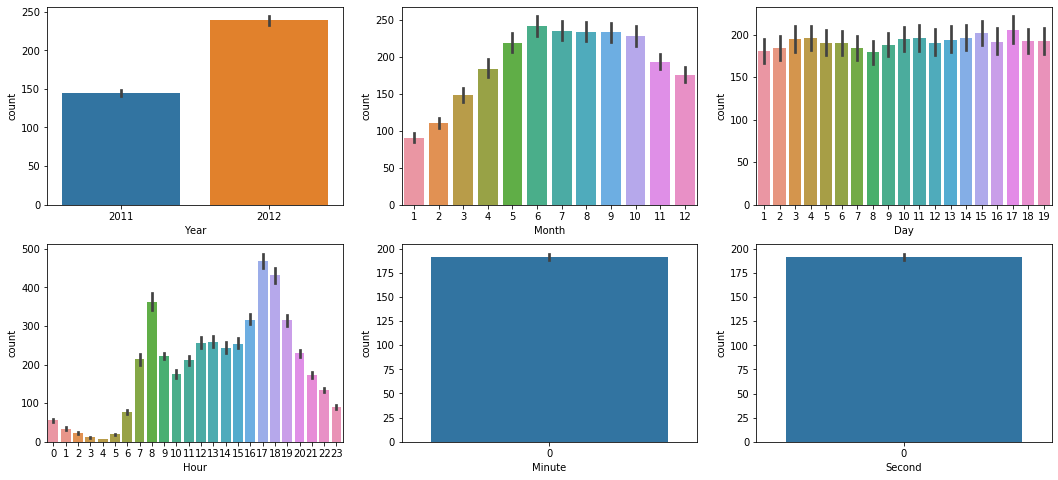

In [10]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)  #matplotlib의 subplots를 이용해 2행 3열의 총 6개의 그래프를 출력하도록 하겠습니다.
fig.set_size_inches(18, 8)  #전체 그래프를 보기 쉽도록 크기를 조절하도록 하겠습니다.
sns.barplot(data = train, x = 'Year', y = 'count', ax = ax1)  #seaborn의 barplot을 이용해 연도와 대여량의 관계를 보도록 하겠습니다.
sns.barplot(data = train, x = 'Month', y = 'count', ax = ax2)  #seaborn의 barplot을 이용해 월과 대여량의 관계를 보도록 하겠습니다.
sns.barplot(data = train, x = 'Day', y = 'count', ax = ax3)  #seaborn의 barplot을 이용해 일과 대여량의 관계를 보도록 하겠습니다.
sns.barplot(data = train, x = 'Hour', y = 'count', ax = ax4)  #seaborn의 barplot을 이용해 시간과 대여량의 관계를 보도록 하겠습니다.
sns.barplot(data = train, x = 'Minute', y = 'count', ax = ax5)  #seaborn의 barplot을 이용해 분과 대여량의 관계를 보도록 하겠습니다.
sns.barplot(data = train, x = 'Second', y = 'count', ax = ax6)  #seaborn의 barplot을 이용해 일과 대여량의 관계를 보도록 하겠습니다.

먼저, 연도별 그래프를 보면 2011년 대비 2012년의 대여량이 많이 증가한 것을 알 수 있습니다. 2012년이 2011년 보다 성장한 것 같습니다. \
두 번째로 월별 그래프를 보면 겨울에 해당하는 1, 2, 12월이 다른 달에 비해 대여량이 적은 것을 알 수 있습니다. 따라서 날이 따뜻할수록 대여량이 많아질 것으로 예상할 수 있을 것입니다. \
세 번째로 일별 그래프를 보면 일별로 크게 대여량 차이가 없는 것을 알 수 있습니다. 따라서 해당 일별 데이터는 굳이 사용하지 않는 것이 좋을 것 같습니다. 또한, 19일까지만 존재하는 것으로 봤을 때 train과 test 데이터를 나누는 기준일 것으로 예상돼 머신러닝 적용시 과적합을 막기 위해 사용하지 않는 편이 나을 것 같습니다. \
네 번째로 시간별 그래프를 보면 아침 시간대와 저녁 시간대에 대여량이 많은 것을 알 수 있습니다. 이는 출근 시간과 퇴근 시간에 대여량이 많아질 것으로 예상할 수 있을 것입니다. \
다섯 번째로 분별 그래프를 보면 x축이 전부 0인 것을 볼 수 있습니다. 전처리 과정에서 분별 데이터 값을 보면 0만 존재하기 때문입니다. 이런 데이터는 크게 도움이 되지 않을 것이므로 사용하지 않도록 하겠습니다. \
여섯 번째로 초별 그래프를 보면 분별 그래프와 마찬가지 형태를 띄고 있으므로 초별 데이터도 사용하지 않도록 하겠습니다.

##### datetime year-month 대여량 분석

2011년 대비 2012년에 대여량이 증가한 것을 통해 그만큼 성장했을 것이라는 판단으로 연도별 월 대여량을 비교해 보도록 하겠습니다.

In [11]:
train['Year_month'] = train['Year'].astype(str) + '-' + train['Month'].astype(str)  #연도와 월 데이터를 str형태로 합쳐 새로운 컬럼을 만들도록 하겠습니다.
train['Year_month'].head()  #연도와 월 데이터가 잘 합쳐진 것을 볼 수 있습니다.

0    2011-1
1    2011-1
2    2011-1
3    2011-1
4    2011-1
Name: Year_month, dtype: object

시각화를 통해 자세히 파악해 보도록 하겠습니다.

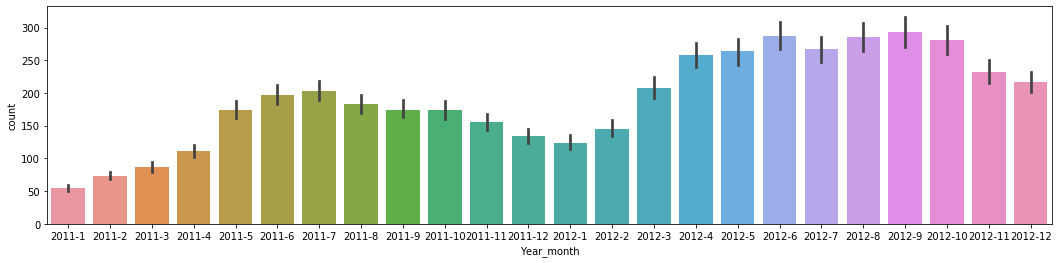

In [12]:
plt.figure(figsize = (18, 4))  #matplotlib을 이용해 그래프 사이즈를 보기 좋게 변경하도록 하겠습니다.
sns.barplot(data = train, x = 'Year_month', y = 'count')  #연도별 월과 대여량의 관계를 보도록 하겠습니다.

그래프를 보면 2012년의 월별 대여량이 2011년의 월별 대여량에 비해 상당히 많다는 것을 알 수 있습니다. 이럴 경우 단순히 월별 데이터를 머신러닝에 적용하면 연도별 대여량의 성장분을 고려하지 못해 혼란을 야기할 가능성이 있을 수 있습니다. 따라서 월별 데이터는 머신러닝에 적용하지 않는 쪽으로 하겠습니다.

##### datetime_hour 대여량 분석

이번에는 시간대별 데이터를 자세하게 파악해 보겠습니다. 위에서 시간대별 그래프를 봤을 때 출근 시간대와 퇴근 시간대에 대여량이 많아지는 것을 확인했습니다. 따라서 일과 관련된 컬럼인 workingday, dayofweek와 함께 분석하도록 하겠습니다.

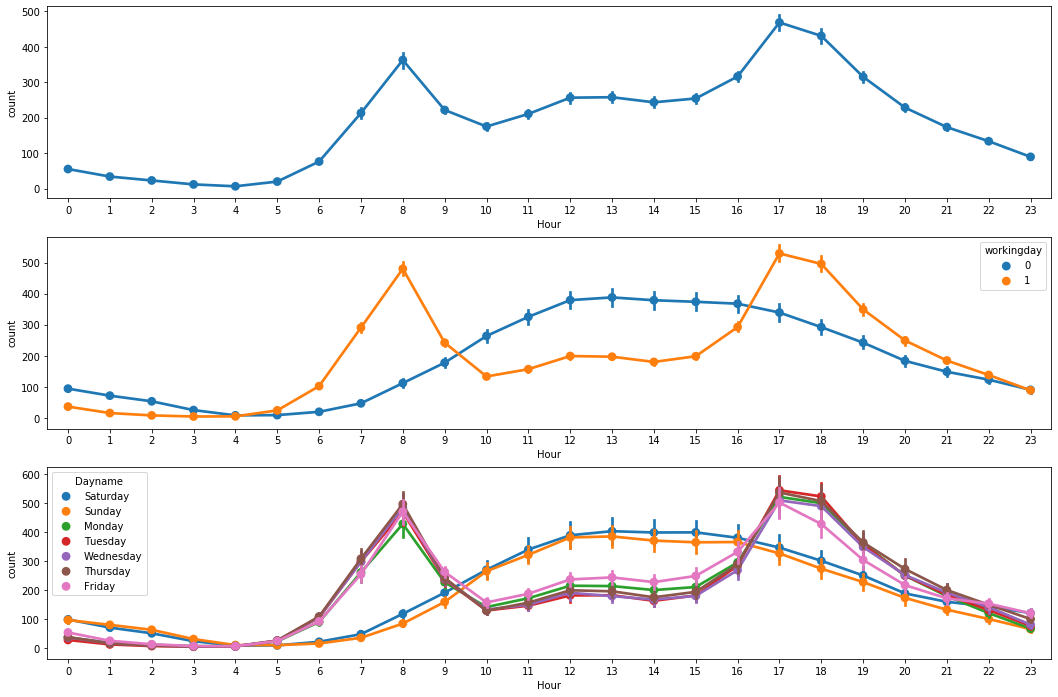

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1)  #matplotlib의 subplots를 이용해 3행 1열의 총 3개의 그래프를 출력하도록 하겠습니다.
fig.set_size_inches(18, 12)  #전체 그래프를 보기 쉽도록 크기를 조절하도록 하겠습니다.
sns.pointplot(data = train, x = 'Hour', y = 'count', ax = ax1)  #seaborn의 pointplot을 이용해 시간대와 대여량의 관계를 보도록 하겠습니다.
sns.pointplot(data = train, x = 'Hour', y = 'count', hue = 'workingday', ax = ax2)  #seaborn의 pointplot을 이용해 시간대와 대여량의 관계를 근무일 기준으로 보도록 하겠습니다.
sns.pointplot(data = train, x = 'Hour', y = 'count', hue = 'Dayname', ax = ax3)  #seaborn의 pointplot을 이용해 시간대와 대여량의 관계를 요일 기준으로 보도록 하겠습니다.

먼저, 시간대별 그래프를 보면 출퇴근 시간대에 확실히 대여량이 많은 것을 알 수 있습니다. \
두 번째로 근무일 기준 시간대별 그래프를 보면 근무일이 아닐 때에는 오히려 오후 시간대에 대여량이 많은 것을 알 수 있습니다. \
세 번째로 요일 기준 시간대별 그래프를 보면 평일과 주말 그리고 각 요일별로 대여량 차이가 나는 것을 알 수 있습니다. \
결론적으로 시간대, 근무일, 요일별로 그 특성이 다르기 때문에 머신러닝에 함께 적용하는 것이 더 효과적일 것으로 예상합니다.

최종적으로 datetime 컬럼에서는 Year, Hour, Dayofweek만 머신러닝에 적용하도록 하겠습니다.

#### weather 날씨별 대여량 분석

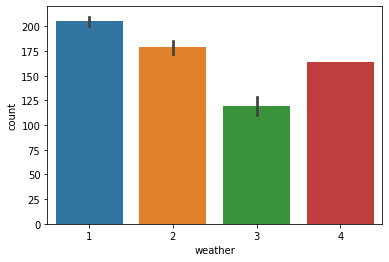

In [14]:
sns.barplot(data = train, x = 'weather', y = 'count')  #seaborn의 barplot을 이용해 날씨와 대여량의 관계를 확인해 보도록 하겠습니다.

일반적인 사고처럼 날씨가 좋을수록 대여량이 많은 것을 확인할 수 있습니다. 하지만, 악천후인 4번의 날씨가 3번 보다 대여량이 높게 나온 것은 다소 의외인 것 같습니다. 날씨 데이터의 4번 값을 한 번 확인해 보도록 하겠습니다.

In [15]:
train[train['weather'] == 4]  #weather의 값이 4인 데이터를 색인해 보도록 하겠습니다.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,Year,Month,Day,Hour,Minute,Second,Dayofweek,Dayname,Year_month
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,...,164,2012,1,9,18,0,0,0,Monday,2012-1


weather가 4인 값을 찾아보니 만 개가 넘는 데이터 중 단 한 개만 존재하는 것을 알 수 있습니다. 만약 현재 상태로 weather를 머신러닝에 적용하면 혼란을 야기할 수 있기 때문에 가장 비슷한 날씨인 3으로 변경하도록 하겠습니다.

In [16]:
train.loc[train['weather'] == 4, 'weather'] = 3  #weather 4의 값을 3으로 변경합니다.

또한, weather 컬럼의 값이 숫자형이기는 하나 사실상 범주형이기 때문에 One-hot 인코딩을 하도록 하겠습니다.

In [17]:
train['weather_1'] = (train['weather'] == 1)  #weather 값이 1이면 참 아니면 거짓을 출력하도록 합니다.
train['weather_2'] = (train['weather'] == 2)  #weather 값이 2이면 참 아니면 거짓을 출력하도록 합니다.
train['weather_3'] = (train['weather'] == 3)  #weather 값이 3이면 참 아니면 거짓을 출력하도록 합니다.
train[['weather', 'weather_1', 'weather_2', 'weather_3']].head()

,weather,weather_1,weather_2,weather_3
0,1,True,False,False
1,1,True,False,False
2,1,True,False,False
3,1,True,False,False
4,1,True,False,False


In [18]:
test['weather'].value_counts()  #test 데이터에서도 4의 데이터가 상당히 부족하기 때문에 3으로 변경하도록 하겠습니다.

1    4221
2    1710
3     560
4       2
Name: weather, dtype: int64

In [19]:
test[test['weather'] == 4]  

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Hour,Minute,Second,Dayofweek,Dayname
154,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.0028,2011,1,26,16,0,0,2,Wednesday
3248,2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,12.9980,2012,1,21,1,0,0,5,Saturday


In [20]:
test.loc[test['weather'] == 4, 'weather'] = 3  #weather 4의 값을 3으로 변경합니다.

In [21]:
test['weather_1'] = (test['weather'] == 1)  #test 데이터에도 적용하도록 하겠습니다.
test['weather_2'] = (test['weather'] == 2)
test['weather_3'] = (test['weather'] == 3)

weather 데이터 분석 결과 날씨가 좋아질수록 대여량이 많다는 점을 알 수 있었고 예측에 혼란이 될 부분을 제거함에 따라 예측의 성능이 높아질 것으로 예상됩니다.

#### season 계절별 대여량 분석

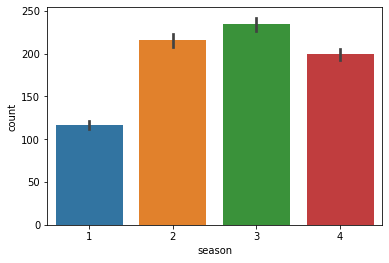

In [22]:
sns.barplot(data = train, x = 'season', y = 'count')  #seaborn의 barplot을 이용해 계절과 대여량의 관계를 확인해 보도록 하겠습니다.

계절별 그래프를 보면 여름과 가을에 대여량이 많은 것을 알 수 있습니다. 하지만, 비교적 따뜻한 봄 대여량이 겨울 대여량에 비해 더 적다는 것은 다소 의외의 결과인 것 같습니다. 계절 데이터를 살펴보도록 하겠습니다.

In [23]:
train.loc[train['season'] == 1, ['Month', 'season']]  #season이 1인 값의 달과 계절을 확인해 보도록 하겠습니다.

,Month,season
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
6780,3,1
6781,3,1
6782,3,1
6783,3,1


확인 결과 1, 2, 3월이 봄으로 지정된 것을 알 수 있습니다. 일반적으로 1, 2월은 겨울에 속하므로 계절 설정이 잘못되어 있는 것을 알 수 있습니다. 따라서 계절 설정을 3, 4, 5월은 봄 6, 7, 8월은 여름 9, 10, 11월은 가을 12, 1, 2월은 겨울로 바꿔주도록 하겠습니다.

In [24]:
def season(month):  #def함수를 이용해 월별 계절을 재설정 하도록 하겠습니다.
    if month in [3, 4, 5]:  #3, 4, 5월이면 1을 출력하도록 합니다.
        return 1
    elif month in [6, 7, 8]:  #6, 7, 8월이면 2를 출력하도록 합니다.
        return 2
    elif month in [9, 10, 11]:  #9, 10, 11월이면 3을 출력하도록 합니다.
        return 3
    else:                     #그 외 12, 1, 2월이면 4를 출력하도록 합니다.
        return 4

In [25]:
train['season'] = train['Month'].apply(season)  #위에서 정의한 season함수를 월 데이터에 적용해 season 데이터를 재정의하도록 하겠습니다.
train[['Month', 'season']]  #적용 결과 재정의 전과 다르게 1월이 겨울로 설정된 것을 확인할 수 있습니다.

,Month,season
0,1,4
1,1,4
2,1,4
3,1,4
4,1,4
...,...,...
10881,12,4
10882,12,4
10883,12,4
10884,12,4


In [26]:
test['season'] = test['Month'].apply(season)  #test 데이터에도 적용하도록 하겠습니다.
test[['Month', 'season']]

,Month,season
0,1,4
1,1,4
2,1,4
3,1,4
4,1,4
...,...,...
6488,12,4
6489,12,4
6490,12,4
6491,12,4


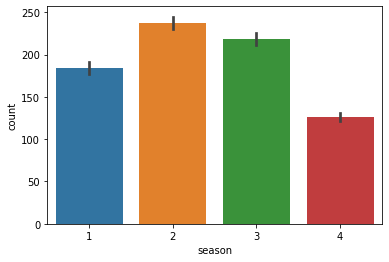

In [27]:
sns.barplot(data = train, x = 'season', y = 'count')  #seaborn의 barplot을 이용해 재정의한 계절과 대여량의 관계를 확인해 보도록 하겠습니다.

재정의한 후 계절별 그래프를 본 결과 우리가 예상하듯이 따뜻한 계절일 수록 대여량이 많은 것을 알 수 있습니다. season 데이터도 weather와 마찬가지로 범주형 데이터에 속하기 때문에 One-hot 인코딩을 진행하도록 하겠습니다.

In [28]:
train['season_1'] = train['season'].apply(lambda x : True if x == 1 else False)  #lambda를 이용해 season이 1이면 참 아니면 거짓을 출력하도록 하겠습니다.
train['season_2'] = train['season'].apply(lambda x : True if x == 2 else False)  #lambda를 이용해 season이 2이면 참 아니면 거짓을 출력하도록 하겠습니다.
train['season_3'] = train['season'].apply(lambda x : True if x == 3 else False)  #lambda를 이용해 season이 3이면 참 아니면 거짓을 출력하도록 하겠습니다.
train['season_4'] = train['season'].apply(lambda x : True if x == 4 else False)  #lambda를 이용해 season이 4이면 참 아니면 거짓을 출력하도록 하겠습니다.

In [29]:
train[['season', 'season_1', 'season_2', 'season_3', 'season_4']].head()  #적용이 잘된 것을 확인할 수 있습니다.

,season,season_1,season_2,season_3,season_4
0,4,False,False,False,True
1,4,False,False,False,True
2,4,False,False,False,True
3,4,False,False,False,True
4,4,False,False,False,True


In [30]:
test['season_1'] = test['season'].apply(lambda x : True if x == 1 else False)  #test 데이터에도 적용하도록 하겠습니다.
test['season_2'] = test['season'].apply(lambda x : True if x == 2 else False)  
test['season_3'] = test['season'].apply(lambda x : True if x == 3 else False)  
test['season_4'] = test['season'].apply(lambda x : True if x == 4 else False)  

In [31]:
test[['season', 'season_1', 'season_2', 'season_3', 'season_4']].head()

,season,season_1,season_2,season_3,season_4
0,4,False,False,False,True
1,4,False,False,False,True
2,4,False,False,False,True
3,4,False,False,False,True
4,4,False,False,False,True


season 데이터 분석 결과 따뜻한 계절일수록 대여량이 많아 지는 것을 확인할 수 있었습니다. 또한, 계절을 재정의하고 범주형 데이터를 One-hot 인코딩 했기 때문에 예측 성능이 높아질 것으로 예상됩니다.

#### 연속형 데이터 분석

-범주형 데이터가 아닌 범위가 넓은 연속형 데이터의 경우 곧 바로 목표인 대여량과의 관계를 파악하는 일은 쉽지 않습니다. 따라서 연속형 데이터끼리의 관계를 파악하거나 각 컬럼의 특성을 파악해 전처리한 후 필요한 컬럼을 선별하는 작업을 하도록 하겠습니다.

##### 먼저, temp와 atemp의 관계를 확인해 보도록 하겠습니다.

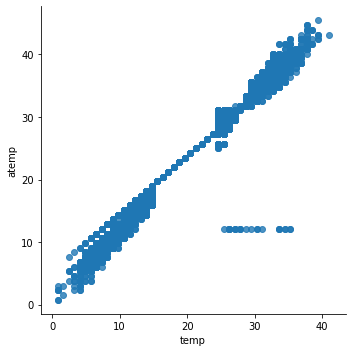

In [32]:
sns.lmplot(data = train, x = 'temp', y = 'atemp', fit_reg = False)  #seaborn의 lmplot을 이용해 온도와 체감온도의 관계를 확인하도록 하겠습니다.

온도와 체감온도의 관계가 사실상 선형관계를 보이고 있기 때문에 두 데이터의 성향이 일치한다고 볼 수 있을 것 같습니다. 따라서 머신러닝에 적용할 때는 온도와 체감온도 둘 다 적용하는 것보다는 하나만 적용하는 것이 더 효과적일 것으로 예상됩니다.

##### temp와 humidity의 관계를 확인해 보도록 하겠습니다.

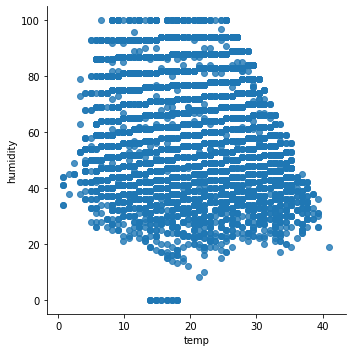

In [33]:
sns.lmplot(data = train, x = 'temp', y = 'humidity', fit_reg = False)  #seaborn의 lmplot을 이용해 온도와 습도의 관계를 확인하도록 하겠습니다.

그래프를 확인해보면 온도와 습도 사이에는 뚜렷한 관계가 보이지 않는 것 같습니다. 하지만, 온도와 습도 컬럼을 이용해 새로운 컬럼을 만들 수 있을 것 같습니다. 불쾌지수라는 새로운 컬럼을 만들 것인데 불쾌지수는 온도와 습도를 이용해 계산을 할 수 있기 때문입니다.

불쾌지수를 구하는 공식은 다음과 같습니다. 불쾌지수(Temperature Humidity Index, THI) = 9/5 * [온도] - (0.55 * (1-1/100*[습도]) * ((9/5 * [온도]) - 26)) + 32

불쾌지수를 THI라는 컬럼명으로 지정해 train 데이터와 test 데이터에 각각 만들어 보도록 하겠습니다.

In [34]:
train['THI'] = 9/5 * train['temp'] - (0.55 * (1-1/100*train['humidity']) * ((9/5 * train['temp']) - 26)) + 32

In [35]:
test['THI'] = 9/5 * test['temp'] - (0.55 * (1-1/100*test['humidity']) * ((9/5 * test['temp']) - 26)) + 32

불쾌지수에 따라 사람들이 불쾌감을 느끼는 정도가 다른 사실이 있습니다. 68 미만은 모든 사람이 쾌적함을 느끼고 68 ~ 74는 불쾌감을 서서히 느끼기 시작합니다. 75 ~ 79는 50% 정도의 사람이 불쾌감을 느끼고 80 이상이 되면 모든 사람이 불쾌감을 느낍니다. 따라서 불쾌감 정도에 따라 대여량에 영향을 미칠 것이라는 가정하에 범주화 One-hot 인코딩을 하도록 하겠습니다.

In [36]:
train['THI_good'] = (train['THI'] < 68)  #THI가 68 미만이면 참 아니면 거짓을 출력하도록 하겠습니다.
train['THI_bad'] = ((train['THI'] >= 68) & (train['THI'] < 74))  #THI가 68 이상 74 미만이면 참 아니면 거짓을 출력하도록 합니다.
train['THI_worse'] = ((train['THI'] >= 74) & (train['THI'] < 80))  #THI가 74 이상 80 미만이면 참 아니면 거짓을 출력하도록 합니다.
train['THI_worst'] = (train['THI'] >= 80)  #THI가 80 이상이면 참 아니면 거짓을 출력하도록 하겠습니다.
train[['THI', 'THI_good', 'THI_bad', 'THI_worse', 'THI_worst']].head()

,THI,THI_good,THI_bad,THI_worse,THI_worst
0,50.578096,True,False,False,False
1,49.310040,True,False,False,False
2,49.310040,True,False,False,False
3,50.851600,True,False,False,False
4,50.851600,True,False,False,False


In [37]:
test['THI_good'] = (test['THI'] < 68)  #test 데이터에도 적용하도록 하겠습니다.
test['THI_bad'] = ((test['THI'] >= 68) & (test['THI'] < 74))  
test['THI_worse'] = ((test['THI'] >= 74) & (test['THI'] < 80))  
test['THI_worst'] = (test['THI'] >= 80)  
test[['THI', 'THI_good', 'THI_bad', 'THI_worse', 'THI_worst']].head()

,THI,THI_good,THI_bad,THI_worse,THI_worst
0,52.836504,True,False,False,False
1,52.836504,True,False,False,False
2,52.836504,True,False,False,False
3,52.836504,True,False,False,False
4,52.836504,True,False,False,False


##### windspeed 풍속 데이터 분석

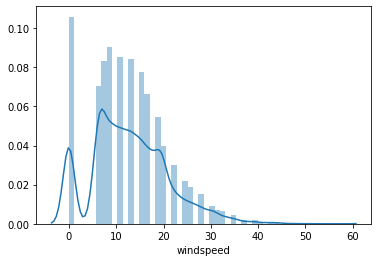

In [38]:
sns.distplot(train['windspeed'])  #seaborn의 distplot을 이용해 windspeed 값의 분포 정도를 확인하도록 하겠습니다.

그래프를 확인한 결과 풍속이 0인 값이 가장 많이 나온 것을 확인할 수 있습니다. 하지만, 일반적으로 1년 중 풍속이 0인 날은 그렇게 많지 않을 것으로 생각됩니다. 따라서 이는 풍속 측정이 안되었을 가능성이 있다고 판단해 풍속이 0이 아닌 값을 바탕으로 머신러닝을 이용해 다시 채워 넣도록 하겠습니다.

In [39]:
from sklearn.ensemble import RandomForestRegressor
ws0 = train[train['windspeed'] == 0]  #windspeed가 0인 데이터들을 따로 추출해 ws0이라는 데이터 프레임으로 만들도록 하겠습니다.
wsnot0 = train[train['windspeed'] != 0]  #windspeed가 0이 아닌 데이터들을 따로 추출해 wsnot0이라는 데이터 프레임으로 만들도록 하겠습니다.

ws0_df = ws0.drop(['datetime', 'windspeed', 'casual', 'registered', 'count', 'Dayname', 'Year_month', 'THI'], axis =1)  #예측에 도움이 되지 않는 컬럼과 문자형 컬럼을 제거한 후 따로 데이터 프레임을 만들도록 하겠습니다.
wsnot0_df = wsnot0.drop(['datetime', 'windspeed', 'casual', 'registered', 'count', 'Dayname', 'Year_month', 'THI'], axis =1)
wsnot0_series = wsnot0['windspeed']  #예측에 이용할 풍력값을 따로 지정하도록 하겠습니다.
model = RandomForestRegressor()  #랜덤포레스트 알고리즘을 모델로 지정해 사용하도록 하겠습니다.
model.fit(wsnot0_df, wsnot0_series)  #학습용 데이터를 랜덤포레스트에 적용하도록 하겠습니다.
ws0['windspeed'] = model.predict(ws0_df)  #예측값을 구하도록 하겠습니다.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [40]:
windspeed = pd.concat([ws0, wsnot0], axis = 0)['windspeed']  #위에서 나눴던 풍력값을 다시 합쳐 windspeed라고 따로 변수를 설정하도록 하겠습니다.

In [41]:
train['windspeed'] = windspeed  #기존의 풍력값에 예측한 풍력값을 적용해 windspeed를 재정의 하도록 하겠습니다.

In [42]:
train['windspeed'].value_counts().head()  #재정의한 결과를 보니 0인 값이 가장 많았던 처음과는 달라진 것을 확인할 수 있습니다. 

8.9981     1120
11.0014    1059
7.0015     1042
12.9980    1042
15.0013     961
Name: windspeed, dtype: int64

위에서 한 작업을 똑같이 test 데이터에도 적용하도록 하겠습니다.

In [43]:
ws0 = test[test['windspeed'] == 0]  #windspeed가 0인 데이터들을 따로 추출해 ws0이라는 데이터 프레임으로 만들도록 하겠습니다.
wsnot0 = test[test['windspeed'] != 0]  #windspeed가 0이 아닌 데이터들을 따로 추출해 wsnot0이라는 데이터 프레임으로 만들도록 하겠습니다.

ws0_df = ws0.drop(['datetime', 'windspeed', 'Dayname', 'THI'], axis =1)  #예측에 도움이 되지 않는 컬럼과 문자형 컬럼을 제거한 후 따로 데이터 프레임을 만들도록 하겠습니다.
wsnot0_df = wsnot0.drop(['datetime', 'windspeed', 'Dayname', 'THI'], axis =1)
wsnot0_series = wsnot0['windspeed']  #예측에 이용할 풍력값을 따로 지정하도록 하겠습니다.
model = RandomForestRegressor()  #랜덤포레스트 알고리즘을 모델로 지정해 사용하도록 하겠습니다.
model.fit(wsnot0_df, wsnot0_series)  #학습용 데이터를 랜덤포레스트에 적용하도록 하겠습니다.
ws0['windspeed'] = model.predict(ws0_df)  #예측값을 구하도록 하겠습니다.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [44]:
windspeed = pd.concat([ws0, wsnot0], axis = 0)['windspeed']  #위에서 나눴던 풍력값을 다시 합쳐 windspeed라고 따로 변수를 설정하도록 하겠습니다.

In [45]:
test['windspeed'] = windspeed  #기존의 풍력값에 예측한 풍력값을 적용해 windspeed를 재정의 하도록 하겠습니다.

이제 재정의한 풍속값으로 예측 성능이 더 좋을 것으로 예상됩니다.

#### count 대여량 분석

이번 주제의 목표인 대여량 데이터를 분석해 보도록 하겟습니다.

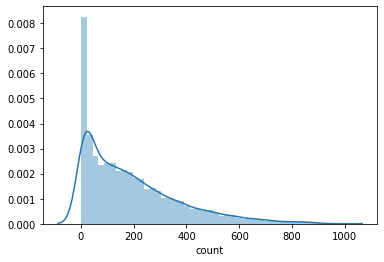

In [46]:
sns.distplot(train['count'])  #seaborn의 distplot을 이용해 count 분포도를 확인하도록 하겠습니다.

그래프를 확인한 결과 오른쪽으로 꼬리가 길게 늘어져 있고 왼쪽에 데이터가 집중되어 있는 모습을 볼 수 있습니다. 이런 그래프는 데이터가 왜곡되어 있는 경우 나타나는 현상으로 해당 컬럼에 로그값을 적용하면 보다 정확하게 데이터를 확인할 수 있습니다. 따라서 count 컬럼에 로그값을 적용해 다시 확인해 보도록 하겠습니다.

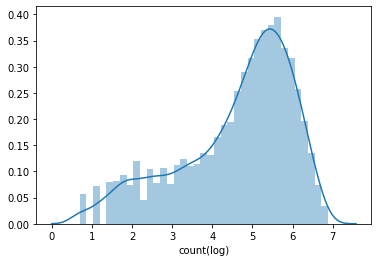

In [47]:
train['count(log)'] = np.log(train['count'] + 1)  #로그값을 적용한 count 컬럼을 count(log)라는 새로운 컬럼에 넣어 주도록 하겠습니다.
sns.distplot(train['count(log)'])  #seaborn의 distplot을 이용해 count(log)의 분포도를 확인하도록 하겠습니다.

그래프를 확인한 결과 이전보다 데이터 분포가 잘 이루어진 것 같습니다. 머신러닝에 적용할 때는 로그값을 적용한 count를 이용하고 예측을 마친 후 로그값을 제거하도록 하겠습니다.

#### 그 외 데이터

-분석에 임하지 않은 holiday, casual, registered는 다음의 이유로 제외하도록 하겠습니다. \
 holiday는 workingday와 같은 의미를 지니고 있기 때문에 굳이 사용할 필요가 없을 것 같습니다. \
 casual과 registered는 train 데이터에만 존재하고 test 데이터에는 존재하지 않기 때문에 사용하지 않아도 될 것 같습니다.

### 훈련용 데이터 및 테스트용 데이터 설정

분석을 통해 확인한 필요 컬럼을 리스트화 해 정리하도록 하겠습니다.

In [73]:
features = ['Year', 'Hour', 'Dayofweek','workingday', 'temp', 'humidity', 'windspeed', 'weather_1', 'weather_2', 'weather_3', 'season_1',
           'season_2', 'season_3', 'season_4', 'THI_good', 'THI_bad', 'THI_worse', 'THI_worst']
features

['Year',
 'Hour',
 'Dayofweek',
 'workingday',
 'temp',
 'humidity',
 'windspeed',
 'weather_1',
 'weather_2',
 'weather_3',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'THI_good',
 'THI_bad',
 'THI_worse',
 'THI_worst']

In [74]:
x_train = train[features]  #features를 이용해 머신러닝에 적용할 데이터 프레임을 따로 x_train으로 지정하도록 하겠습니다.
print(x_train.shape)  #x_train이 10886개의 행과 18개의 열로 이루어져 있는 것을 알 수 있습니다.
x_train.head()  #head 기능을 이용해 잘 적용이 되었는지 상위 5개의 값을 출력해 보겠습니다.

(10886, 18)


,Year,Hour,Dayofweek,workingday,temp,humidity,windspeed,weather_1,weather_2,weather_3,season_1,season_2,season_3,season_4,THI_good,THI_bad,THI_worse,THI_worst
0,2011,0,5,0,9.84,81,6.60218,True,False,False,False,False,False,True,True,False,False,False
1,2011,1,5,0,9.02,80,6.60218,True,False,False,False,False,False,True,True,False,False,False
2,2011,2,5,0,9.02,80,6.50235,True,False,False,False,False,False,True,True,False,False,False
3,2011,3,5,0,9.84,75,6.80251,True,False,False,False,False,False,True,True,False,False,False
4,2011,4,5,0,9.84,75,6.90234,True,False,False,False,False,False,True,True,False,False,False


In [75]:
x_test = test[features]  #test 데이터에도 적용해 주도록 하겠습니다.
print(x_test.shape)
x_test.head()

(6493, 18)


,Year,Hour,Dayofweek,workingday,temp,humidity,windspeed,weather_1,weather_2,weather_3,season_1,season_2,season_3,season_4,THI_good,THI_bad,THI_worse,THI_worst
0,2011,0,3,1,10.66,56,26.00270,True,False,False,False,False,False,True,True,False,False,False
1,2011,1,3,1,10.66,56,11.29955,True,False,False,False,False,False,True,True,False,False,False
2,2011,2,3,1,10.66,56,11.29955,True,False,False,False,False,False,True,True,False,False,False
3,2011,3,3,1,10.66,56,11.00140,True,False,False,False,False,False,True,True,False,False,False
4,2011,4,3,1,10.66,56,11.00140,True,False,False,False,False,False,True,True,False,False,False


### 타겟 변수 설정

In [51]:
y_train = train['count(log)']  #타겟 변수인 count에 로그값을 적용한 데이터를 train 데이터에서 가져와 y_train으로 지정하도록 하겠습니다.
print(y_train.shape)
y_train.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count(log), dtype: float64

### 머신러닝 알고리즘 모델 적용

머신러닝 알고리즘 모델에는 다양한 종류가 존재하나 이번에는 scikit-learn의 RandomForest를 이용해 보도록 하겠습니다. 이번 주제의 목표가 연속형 데이터 예측이기 때문에 회귀형 모델을 사용하도록 하겠습니다.

In [52]:
from sklearn.ensemble import RandomForestRegressor  #scikit-learn에서 회귀형 RandomForest인 RandomForestRegressor 모델을 가져오도록 하겠습니다.
model = RandomForestRegressor()  #불러온 모델을 model이라는 변수에 담아주도록 하겠습니다.
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

#### Hyperparmeter 설정

머신러닝 모델의 옵션에 해당하는 hyperparameter의 최적값을 Grid Search로 찾아 보도록 하겠습니다. Grid Search를 하기 위해서는 모델을 평가할 스코어가 필요하므로 scikitlearn에서 make_scorer를 이용해 스코어 모델을 만든 후 hyperparameter 값을 찾도록 하겠습니다. 이번 캐글 자전거 수요 예측에서 평가 방법을 보면 RMSLE(Root Mean Squared Logamithric Error)인 것을 알 수 있습니다. 이는 평가에 로그값을 적용해 정답과 예측값의 차이가 클수록 페널티를 덜 주는 방식입니다. 하지만, 위에서 이미 목표 변수인 count에 로그값을 적용했으므로 RMSE(Root Mean Squared Error)를 이용하면 평가 양식에 맞는 스코어가 나올 것 같습니다.

In [56]:
from sklearn.metrics import make_scorer  #scikitlearn에서 make_scorer를 불러오도록 하겠습니다.

def rmse(p, a):  #def를 이용해 예측값과 정답에 대한 rmse 함수를 정의하도록 하겠습니다.
    p = np.array(p)  #예측값에 해당하는 부분을 p라는 변수로 만들도록 하겠습니다.
    a = np.array(a)  #정답에 해당하는 부분을 a라는 변수로 만들도록 하겠습니다.
                     #각 값에 array를 적용해 계산을 보다 빠르게 하도록 하겠습니다.
    difference = p - a  #예측값과 정답의 차이를 difference라는 변수로 만들도록 하겠습니다.
    
    squared_difference = difference ** 2  #예측값과 정답의 차이에 제곱한 값을 squared_difference라는 변수로 만들도록 하겠습니다.
    
    mean_squared_difference = squared_difference.mean()  #예측값과 정답의 차이에 제곱한 값의 평균을 mean_squared_difference라는 변수로 만들도록 하겠습니다.
    
    score = np.sqrt(mean_squared_difference)  #마지막으로 numpy의 sqrt 루트값을 적용해 score라는 변수로 만들도록 하겠습니다.
    
    return score  #모든 연산을 한 후 스코어를 출력하도록 하겠습니다.

rmse_score = make_scorer(rmse)  #새롭게 정의한 remse함수를 scikitlearn의 make_scorer를 이용해 사용할 수 있도록 만들고 이를 rmse_score라는 변수로 만들도록 하겠습니다.
rmse_score

make_scorer(rmse)

In [67]:
from sklearn.model_selection import cross_val_score  #scikit-learn에서 교차검증 스코어 모델을 불러오도록 하겠습니다.

n_estimators = 100  #랜덤포레스트에서 만들 트리의 갯수인 n_estimators는 갯수가 많을수록 좋으나 코드 구동에 있어서 갯수가 많을수록 오래걸려 우선은 간단한 값으로 설정한 후 머신러닝에 적용할 때 높이도록 하겠습니다.

max_depth_list = [10, 30, 50, 70, 90]  #RandomForest에서 뿌리에 해당하는 max_depth의 후보를 20단위로 10~90의 값으로 설정하도록 하겠습니다.

max_features_list = [0.1, 0.3, 0.5, 0.7, 0.9]  #전체 features 중 몇 퍼센트를 사용할지에 해당하는 max_features의 후보를 0.2단위로 0.1~0.9의 값으로 설정하도록 하겠습니다.

hyperparameters_list = []  #hyperparameter 값의 결과를 리스트로 묶도록 하겠습니다.

for max_depth in max_depth_list:  #max_depth_list의 값을 하나씩 반복해서 넣도록 하겠습니다.
    for max_features in max_features_list:  #동시에 max_features_list의 값을 하나씩 반복해서 넣도록 하겠습니다.
    
        model = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features, random_state = 7)  #결과가 아무렇게나 나오지 않도록 고정하기 위해 random_state를 사용하도록 하겠습니다.
    
        score = cross_val_score(model, x_train, y_train, cv = 20, scoring = rmse_score).mean()  #스코어 예측은 위에서 정의한 rmse로 하고 교차검증 20번의 평균 값을 출력하도록 하겠습니다.
    
        hyperparameters = {  #설정될 값을 각각 딕셔너리로 묶어주도록 하겠습니다.
            'max_depth': max_depth,
            'max_features': max_features,
            'score': score,
                      }
    
        hyperparameters_list.append(hyperparameters)  #무작위로 조합한 hyperparameter의 값을 리스트에 추가하도록 하겠습니다.
    
        print(f"max_depth = {max_depth:2}, max_features = {max_features}, Score = {score}")  #무작위로 조합된 hyperparameter의 값과 예측된 스코어를 출력하도록 하겠습니다.   

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)  #리스트의 값들을 데이터 프레임화해 보기 좋게 만들도록 하겠습니다.
          
hyperparameters_list = hyperparameters_list.sort_values(by = 'score')  #예측된 스코어를 낮은 순으로 정렬하도록 하겠습니다.

print(hyperparameters_list.shape)

hyperparameters_list.head(10)  #출력된 데이터의 상위 10개 값을 보도록 하겠습니다.

max_depth = 10, max_features = 0.1, Score = 0.799892552664518
max_depth = 10, max_features = 0.3, Score = 0.5450654972755575
max_depth = 10, max_features = 0.5, Score = 0.45286529608887777
max_depth = 10, max_features = 0.7, Score = 0.4272842277885771
max_depth = 10, max_features = 0.9, Score = 0.41776697561988707
max_depth = 30, max_features = 0.1, Score = 0.6631041630675797
max_depth = 30, max_features = 0.3, Score = 0.476708869714764
max_depth = 30, max_features = 0.5, Score = 0.4078082505601036
max_depth = 30, max_features = 0.7, Score = 0.39735505882237226
max_depth = 30, max_features = 0.9, Score = 0.39623822876826637
max_depth = 50, max_features = 0.1, Score = 0.6628600600109402
max_depth = 50, max_features = 0.3, Score = 0.47692355020349286
max_depth = 50, max_features = 0.5, Score = 0.4081469666889622
max_depth = 50, max_features = 0.7, Score = 0.39793526470727436
max_depth = 50, max_features = 0.9, Score = 0.39630910086012044
max_depth = 70, max_features = 0.1, Score = 0.6628

,max_depth,max_features,score
9,30,0.9,0.396238
24,90,0.9,0.396309
19,70,0.9,0.396309
14,50,0.9,0.396309
8,30,0.7,0.397355
18,70,0.7,0.397935
13,50,0.7,0.397935
23,90,0.7,0.397935
7,30,0.5,0.407808
22,90,0.5,0.408147


출력 결과 9번째 결과가 0.396238의 스코어로 가장 좋은 결과를 냈습니다. 따라서 해당 스코어의 parameter인 max_depth 30과 max_features 0.9의 값을 RandomForest에 적용하도록 하겠습니다.

In [68]:
model = RandomForestRegressor(n_estimators = 100, max_depth = 30, max_features = 0.9, n_jobs = -1, random_state = 7)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features=0.9, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=7, verbose=0,
                      warm_start=False)

#### 머신러닝 학습

In [77]:
model.fit(x_train, y_train)  #정리한 훈련용 데이터를 RandomForest에 적용하도록 하겠습니다.

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features=0.9, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=7, verbose=0,
                      warm_start=False)

#### 결과 예측

In [79]:
log_predictions = model.predict(x_test)  #학습된 머신러닝으로 test 데이터의 대여량을 예측하도록 하겠습니다.
print(log_predictions.shape)
log_predictions[:5]  #예측값의 상위 5개 값을 보도록 하겠습니다.

(6493,)


array([3.01866561, 2.11095989, 1.93030208, 1.64288022, 1.38859849])

#### 예측 결과 로그값 제거

목표 변수인 count에 로그값을 적용한 상태에서 예측을 했기 때문에 예측이 다 끝난 상황에서는 원래 값으로 돌려놓도록 하겠습니다.

In [71]:
predictions = np.exp(log_predictions) - 1  #numpy의 exp 지수값을 이용해 로그값에서 원래 목표값으로 돌려놓도록 하겠습니다.
print(predictions.shape)
predictions[:5]

(6493,)


array([18.68093238,  8.20646002,  5.6573423 ,  3.9438954 ,  2.90675497])

### 결과물 제출

In [72]:
submit = pd.read_csv('sampleSubmission.csv')  #캐글 제출 파일 형식인 submission csv파일을 submit이라는 변수에 넣어주도록 하겠습니다.
submit['count'] = predictions  #제출 파일의 타겟 변수에 예측값을 대입하도록 하겠습니다.
submit.to_csv('최종 결과물.csv', index = False)  #to_csv 기능을 이용해 제출 파일을 따로 만들도록 하겠습니다. 